# Cleaning US Census Data (fictional)

I got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.
The person who had my job before, left me all the data they had for the most recent census. It is in multiple csv files. They didn’t use pandas, they would just look through these csv files manually.
I will make some scatterplots and histograms, getting this data into pandas.

## Steps:
### 1) Inspecting the Data:
All the csv files are called similar, they start with "states" but end with a different number.

Using glob, I loop through the census files available and load them into DataFrames. Then, I concatenate all of those DataFrames together into one DataFrame, called **us_census**.

After this, I will inspect the dataframe looking at columns and datatypes to see if they need to be converted into the right type for manipulation.

### 2) Cleaning the data
I convert some datatypes into the right ones for calculation and visualization. Before that, I have to manipulate some data, removing certain characters that interfere with the convertions, and organizing our data properly for the analysis.

### 3) Visualization
**Scatterplot:** Women population's income. 

**Histogram:** Race categories.

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object
   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific       Income            GenderPop  
0   0.03%  $43,296.36     2341093M_2489527F  
1   1.06%  $70,354.74      

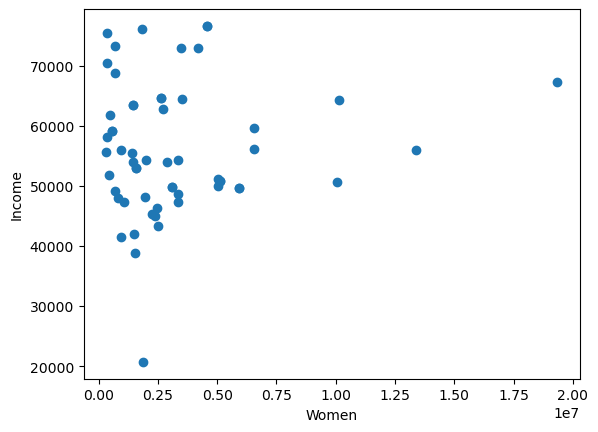

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')


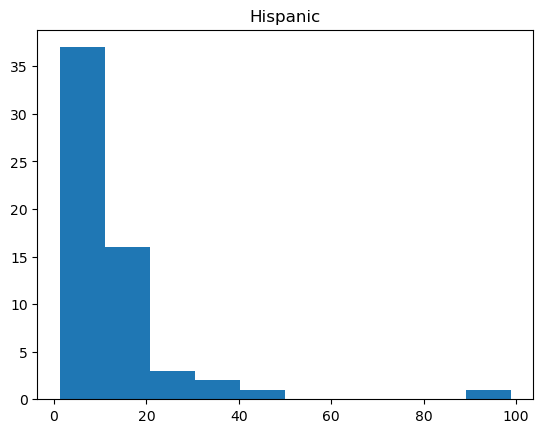

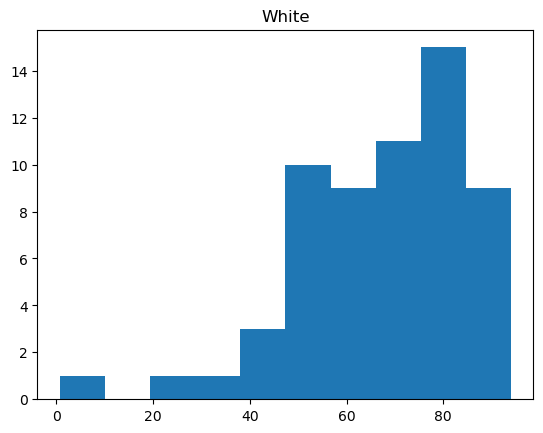

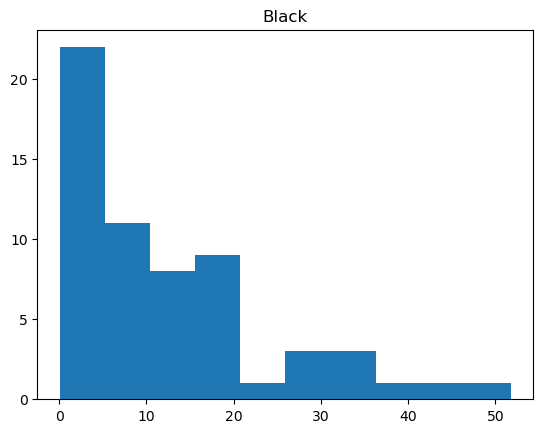

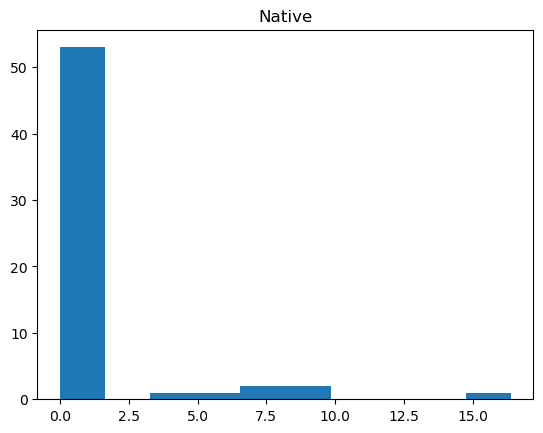

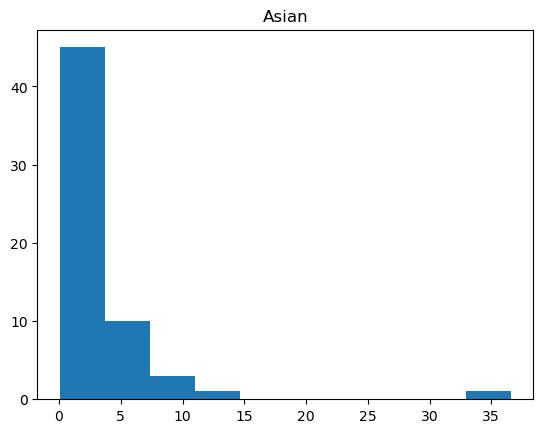

<Figure size 640x480 with 0 Axes>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

## Inspecting the data:

# Using glob, I loop through the census files available and load them into DataFrames. Then, I concatenate all of those DataFrames together into one DataFrame, called us_census.
files = glob.glob('states*.csv')


df_list = []
for filename in files:
  data = pd.read_csv(filename)
  df_list.append(data)

us_census = pd.concat(df_list)

# looking at columns, data types, and first rows to get a feel of the dataframe.

print(us_census.columns)
print(us_census.dtypes)

print(us_census.head())


## Cleaning the data

# Removing the '$' to be able to convert that column into number.
us_census.Income = us_census.Income.replace('[\$,]', '', regex=True)
us_census.Income = pd.to_numeric(us_census.Income)

# Separating the column into those two new columns ('Men' column, and 'Women' column) using str.split.
string_split = us_census.GenderPop.str.split('_')

us_census['Men'] = string_split.str.get(0)
us_census['Women'] = string_split.str.get(1)

# Removing the last character and then converting both columns (Men and Women) into numerical datatypes.
us_census.Men = us_census.Men.str[:-1]
us_census.Men = pd.to_numeric(us_census.Men)

us_census.Women = us_census.Women.str[:-1]
us_census.Women = pd.to_numeric(us_census.Women)

# To avoid "na" values in Women Population, we'll calculate them through the difference between Total Population minus Men Population
us_census['Women'].fillna(us_census['TotalPop'] - us_census['Men'])

# Looking for duplicated values and then dropping them.
duplicated = us_census.duplicated()
print(duplicated.value_counts())

us_census = us_census.drop_duplicates()

## Visualization

# Plotting a scatterplot

plt.scatter(us_census['Women'], us_census['Income'])
plt.xlabel('Women')
plt.ylabel('Income')
plt.show()
plt.clf()

print(us_census.columns)

us_census['Hispanic'] = us_census.Hispanic.str[:-1]
us_census['Hispanic'] = pd.to_numeric(us_census.Hispanic)
us_census['White'] = us_census.White.str[:-1]
us_census['White'] = pd.to_numeric(us_census.White)
us_census['Black'] = us_census.Black.str[:-1]
us_census['Black'] = pd.to_numeric(us_census.Black)
us_census['Native'] = us_census.Native.str[:-1]
us_census['Native'] = pd.to_numeric(us_census.Native)
us_census['Asian'] = us_census.Asian.str[:-1]
us_census['Asian'] = pd.to_numeric(us_census.Asian)
us_census['Pacific'] = us_census.Pacific.str[:-1]
us_census['Pacific'] = pd.to_numeric(us_census.Pacific)

us_census.fillna(value={'Hispanic':us_census.Hispanic.mean(), 'White':us_census.White.mean(), 'Black':us_census.Black.mean(), 'Native':us_census.Native.mean(), 'Asian':us_census.Asian.mean(), 'Pacific':us_census.Pacific.mean()})

plt.hist(us_census['Hispanic'])
plt.title('Hispanic')
plt.show()
plt.clf()

plt.hist(us_census['White'])
plt.title('White')
plt.show()
plt.clf()

plt.hist(us_census['Black'])
plt.title('Black')
plt.show()
plt.clf()

plt.hist(us_census['Native'])
plt.title('Native')
plt.show()
plt.clf()

plt.hist(us_census['Asian'])
plt.title('Asian')
plt.show()
plt.clf()